Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
RF 0.8131868131868132
[[49  3]
 [14 25]]
              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85        52
         1.0       0.89      0.64      0.75        39

    accuracy                           0.81        91
   macro avg       0.84      0.79      0.80        91
weighted avg       0.83      0.81      0.81        91

roc_auc_RF 0.7916666666666666
ANN 0.5494505494505495
[[41 11]
 [30  9]]
              precision    recall  f1-score   support

         0.0       0.58      0.79      0.67        52
         1.0       0.45      0.23      0.31        39

    accuracy                           0.55        91
   macro avg       0.51      0.51      0.49        91
weighted avg       0.52      0.55      0.51        91

roc_auc_ann 0.5096153846153847
  mixed  p  q 0.8132 0.95 0.05
  mixed  p  q 0.8132 0.90 0.10
  mixed  p 

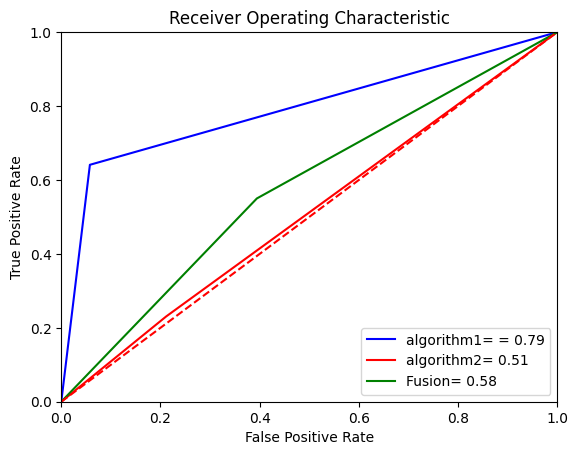

In [2]:


from sklearn.model_selection import StratifiedKFold    
from keras.models import Sequential
from keras.layers import Dense ,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.optimizers import Adam,SGD
from matplotlib import pyplot as plt
import numpy
import numpy as np
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

from google.colab import drive
drive.mount('/content/drive')

dataset = numpy.loadtxt("/content/binary classification.csv", delimiter=",", skiprows=1)

x = dataset[:,0:13]
y = dataset[:,13]
#for 80:20 ratio
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

#for 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

#StandardScaler for normalization for some algortihms
sc = StandardScaler()

#min-max scaler for normalization for some algortihms
scaler = MinMaxScaler(feature_range=(0,1))
#code for RF

from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=100)

model3.fit(X_train,y_train)
rounded_predictions3 = model3.predict(X_test)
predictions3 =model3.predict_proba(X_test)
y_pred3 = rounded_predictions3

        
import sklearn.metrics as metrics
scores3=metrics.accuracy_score(y_test,y_pred3)
print("RF",scores3)  

print(metrics.confusion_matrix(y_test,y_pred3))
print(metrics.classification_report(y_test,y_pred3))

        
fpr3, tpr3, threshold = metrics.roc_curve(y_test, y_pred3)
roc_auc3 = metrics.auc(fpr3, tpr3)
print("roc_auc_RF",roc_auc3)
#code for ANN



from keras import regularizers
from keras.regularizers import l2



scaled_X_train_ann=scaler.fit_transform(X_train)
scaled_X_test_ann=scaler.transform(X_test)



model2 = Sequential()
model2.add(Dense(8, input_dim=13,activation='relu',kernel_regularizer=l2(0.01) ))
model2.add(Dense(1, activation='sigmoid'))
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

#history=model2.fit(scaled_X_train_ann, y_train,validation_split=0.1, batch_size=10,epochs=15,shuffle=True,verbose=2)


predictions2 = model2.predict(scaled_X_test_ann,batch_size=5,verbose=0)
#rounded_predictions2 = model2.predict_classes(scaled_X_test_ann,batch_size=5,verbose=0)
rounded_predictions2=np.round(predictions2).astype(int)
y_pred2 = rounded_predictions2

import sklearn.metrics as metrics
score2=metrics.accuracy_score(y_test,y_pred2)
print("ANN",score2)

print(metrics.confusion_matrix(y_test,y_pred2))
print(metrics.classification_report(y_test,y_pred2))

fpr2, tpr2, threshold = metrics.roc_curve(y_test,y_pred2)
roc_auc2 = metrics.auc(fpr2, tpr2)
print("roc_auc_ann",roc_auc2)

#weighted fusion
#same procedure for every model(1,2 and 3). for every model we need to take the prediction 
# values and then the values will be merged according to the procedure given in below.

#selecting the best value for p and q(p & q represents the weights w1 & w2)
p=1
#q=1-p
for i in range (19):
    p=p-.05
    q=1-p

  
    mixed=predictions3[:,1]*p+predictions2[:,0]*q
    rounded_mixed=mixed
    for i in range(len(y_test)):        
        if mixed[i]>.5:
            rounded_mixed[i]=1
        else:
            rounded_mixed[i]=0

    score=metrics.accuracy_score(rounded_mixed,y_test)
    print("  mixed  p  q","%.4f" %score, "%.2f" %p,"%.2f" %q)


#after selecting the value of p and q which gives the highest accuracy. This value differs for different algorithms.

p=.05
q=1-p

mixed=predictions3[:,1]*p+predictions2[:,0]*q
rounded_mixed=mixed
for i in range(len(y_test)):
    if mixed[i]>=.5:
        rounded_mixed[i]=1
    else:
         rounded_mixed[i]=0
            
score=metrics.accuracy_score(rounded_mixed,y_test)
print("mixed",score)

print(metrics.confusion_matrix(y_test,rounded_mixed))
print(metrics.classification_report(y_test,rounded_mixed))

fpr, tpr, threshold = metrics.roc_curve(rounded_mixed,y_test)
roc_auc = metrics.auc(fpr, tpr)
print("roc_auc_tot",roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr3, tpr3, 'b', label = 'algorithm1= = %0.2f' % roc_auc3)
plt.plot(fpr2, tpr2, 'r', label = 'algorithm2= %0.2f' % roc_auc2)
plt.plot(fpr, tpr, 'g', label = 'Fusion= %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()







In [3]:

from sklearn.model_selection import StratifiedKFold    
from keras.models import Sequential
from keras.layers import Dense ,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.optimizers import Adam,SGD
from matplotlib import pyplot as plt
import numpy
import numpy as np
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
SVM 0.8461538461538461
[[46  3]
 [11 31]]
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        49
         1.0       0.91      0.74      0.82        42

    accuracy                           0.85        91
   macro avg       0.86      0.84      0.84        91
weighted avg       0.86      0.85      0.84        91

roc_auc_SVM 0.83843537414966
LR 0.8461538461538461
[[45  4]
 [10 32]]
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87        49
         1.0       0.89      0.76      0.82        42

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.84        91

roc_auc_LR 0.8401360544217686
  mixed  p  q 0.8571 0.95 0.05
  mixed  p  q 0.8462 0.90 0.10
  mixed  p  q

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive sam

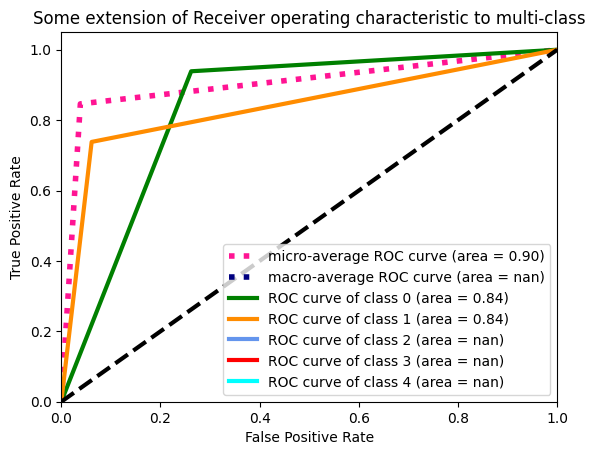

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.optimizers import Adam,SGD
from matplotlib import pyplot as plt
from sklearn import tree
import numpy
import numpy as np
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.ensemble import AdaBoostClassifier

from google.colab import drive
drive.mount('/content/drive')

dataset = numpy.loadtxt("/content/binary classification.csv", delimiter=",",skiprows=1)

x = dataset[:,0:13]
y = dataset[:,13]
#for 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

#for 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

#StandardScaler for normalization for some algortihms
sc = StandardScaler()

#min-max scaler for normalization for some algortihms
scaler = MinMaxScaler(feature_range=(0,1))
# code for SVM

from sklearn.svm import SVC
model4 = SVC(probability=True,C=1,gamma=.01)

scaled_X_train_svm=sc.fit_transform(X_train)
scaled_X_test_svm=sc.transform(X_test)
 
# features for SVM
scaled_X_train_svm1 = scaled_X_train_svm[:,0:13]
scaled_X_test_svm1 = scaled_X_test_svm[:,0:13]

model4.fit(scaled_X_train_svm1,y_train)
            
rounded_predictions4 = model4.predict(scaled_X_test_svm1)
predictions4 =model4.predict_proba(scaled_X_test_svm1)
y_pred4= rounded_predictions4

import sklearn.metrics as metrics
scores4=metrics.accuracy_score(y_test,y_pred4)
print("SVM",scores4)  

print(metrics.confusion_matrix(y_test,y_pred4))
print(metrics.classification_report(y_test,y_pred4))

        
fpr4, tpr4, threshold = metrics.roc_curve(y_test, y_pred4)
roc_auc4 = metrics.auc(fpr4, tpr4)
print("roc_auc_SVM",roc_auc4)
#code for LR

from sklearn.linear_model import LogisticRegression 
model5 =LogisticRegression(C=1)
model5.fit(X_train,y_train)
rounded_predictions5 = model5.predict(X_test)
predictions5 =model5.predict_proba(X_test)
y_pred5= rounded_predictions5

        
import sklearn.metrics as metrics
scores5=metrics.accuracy_score(y_test,y_pred5)
print("LR",scores5)  

print(metrics.confusion_matrix(y_test,y_pred5))
print(metrics.classification_report(y_test,y_pred5))

        
fpr5, tpr5, threshold = metrics.roc_curve(y_test, y_pred5)
roc_auc5 = metrics.auc(fpr5, tpr5)
print("roc_auc_LR",roc_auc5)
p=1
#q=1-p
for i in range (19):
    p=p-.05
    q=1-p

  
    mixed=predictions4[:,1]*p+predictions5[:,1]*q
    rounded_mixed=mixed
    for i in range(len(y_test)):
        if mixed[i]>.5:
            rounded_mixed[i]=1
        else:
            rounded_mixed[i]=0

    score=metrics.accuracy_score(rounded_mixed,y_test)
    print("  mixed  p  q","%.4f" %score, "%.2f" %p,"%.2f" %q)


#after selecting the value of p and q which gives the highest accuracy. This value differs for different algorithms.
p=.85
q=1-p

mixed=predictions4[:,1]*p+predictions5[:,1]*q
for i in range(len(y_test)):
    if mixed[i]>=.5:
        rounded_mixed[i]=1
    else:
         rounded_mixed[i]=0
            
score=metrics.accuracy_score(rounded_mixed,y_test)
print("mixed",score)

print(metrics.confusion_matrix(y_test,rounded_mixed))
print(metrics.classification_report(y_test,rounded_mixed))

fpr, tpr, threshold = metrics.roc_curve(rounded_mixed,y_test)
roc_auc = metrics.auc(fpr, tpr)
print("roc_auc_tot",roc_auc)

mixed

#same code for the plot of the fusion model and the models we used in fusion.


from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(y_pred4, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DT 0.7472527472527473
[[35 14]
 [ 9 33]]
              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75        49
         1.0       0.70      0.79      0.74        42

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91

roc_auc_DT 0.7487911025145068
ADA 0.8351648351648352
[[43  6]
 [ 9 33]]
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85        49
         1.0       0.85      0.79      0.81        42

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

roc_auc_ADA 0.8365384615384616
  mixed  p  q 0.7473 0.95 0.05
  mixed  p  q 0.7473 0.90 0.10
  mixed  p 

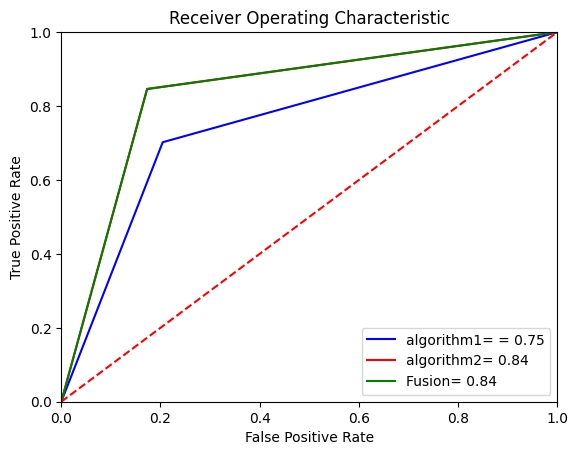

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt
from sklearn import tree
import numpy
import numpy as np
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.ensemble import AdaBoostClassifier

from google.colab import drive
drive.mount('/content/drive')

dataset = numpy.loadtxt("/content/binary classification.csv", delimiter=",",skiprows=1)

x = dataset[:,0:13]
y = dataset[:,13]
#for 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

#for 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

#StandardScaler for normalization for some algortihms
sc = StandardScaler()

#min-max scaler for normalization for some algortihms
scaler = MinMaxScaler(feature_range=(0,1))
#code for decision tree

model1 = tree.DecisionTreeClassifier(criterion= 'gini',
                                                 max_depth= 8,
                                                 max_features= 8,
                                                 min_samples_leaf=7,
                                                 splitter= 'random')

# No normalization

X_train_dt=X_train
X_test_dt=X_test

model1.fit(X_train_dt,y_train)
rounded_predictions1 = model1.predict(X_test_dt)
predictions1 =model1.predict_proba(X_test_dt)
y_pred1 = rounded_predictions1


import sklearn.metrics as metrics
scores1=metrics.accuracy_score(y_test,y_pred1)
print("DT",scores1)  

print(metrics.confusion_matrix(y_test,y_pred1))
print(metrics.classification_report(y_test,y_pred1))

fpr1, tpr1, threshold = metrics.roc_curve(y_pred1,y_test)
roc_auc1 = metrics.auc(fpr1, tpr1)
print("roc_auc_DT",roc_auc1)

# code for adaboost

model2 = AdaBoostClassifier(n_estimators=200,
                         learning_rate=.01)



X_train_dt = X_train[:,0:13]
X_test_dt = X_test[:,0:13]

model2.fit(X_train_dt,y_train)
           
rounded_predictions2 = model2.predict(X_test_dt)
predictions2 =model2.predict_proba(X_test_dt)
y_pred2 = rounded_predictions2


model2.fit(X_train_dt,y_train)
           
rounded_predictions2 = model2.predict(X_test_dt)
predictions2 =model2.predict_proba(X_test_dt)
y_pred2 = rounded_predictions2

        
import sklearn.metrics as metrics
scores2=metrics.accuracy_score(y_test,y_pred2)
print("ADA",scores2)  

print(metrics.confusion_matrix(y_test,y_pred2))
print(metrics.classification_report(y_test,y_pred2))

fpr2, tpr2, threshold = metrics.roc_curve(y_pred2,y_test)
roc_auc2 = metrics.auc(fpr2, tpr2)
print("roc_auc_ADA",roc_auc2)
p=1
#q=1-p
for i in range (19):
    p=p-.05
    q=1-p

  
    mixed=predictions1[:,1]*p+predictions2[:,1]*q
    rounded_mixed=mixed
    for i in range(len(y_test)):
        if mixed[i]>.5:
            rounded_mixed[i]=1
        else:
             rounded_mixed[i]=0

    score=metrics.accuracy_score(rounded_mixed,y_test)
    print("  mixed  p  q","%.4f" %score, "%.2f" %p,"%.2f" %q)


#after selecting the value of p and q which gives the highest accuracy. This value differs for different algorithms.
p=.05
q=1-p

mixed=predictions1[:,1]*p+predictions2[:,1]*q
rounded_mixed=mixed
for i in range(len(y_test)):
    if mixed[i]>=.5:
        rounded_mixed[i]=1
    else:
         rounded_mixed[i]=0
            
score=metrics.accuracy_score(rounded_mixed,y_test)
print("mixed",score)

print(metrics.confusion_matrix(y_test,rounded_mixed))
print(metrics.classification_report(y_test,rounded_mixed))

fpr, tpr, threshold = metrics.roc_curve(rounded_mixed,y_test)
roc_auc = metrics.auc(fpr, tpr)
print("roc_auc_tot",roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'algorithm1= = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'r', label = 'algorithm2= %0.2f' % roc_auc2)
plt.plot(fpr, tpr, 'g', label = 'Fusion= %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


